## Was the Laker's Defense Horrible This Year?

Many fans have been vocally critical about the Laker's defensive abilities this year. Namely, they've made trades that fans have deemed were "good defensive players" and have traded for players who are more offense-oriented as opposed to defense-oriented. 

One of the most direct ways of assessing a team's defensive abilities is to look at how much the opposing team scored against the team in each game. If you have good defense, you should be stopping the other team from scoring points. Therefore, we looked at the historic games the Lakers have played, and look at how many points the opposing team has scored against the Lakers (going back five years). We chose five years as our range because if we go further back, we may see huge variances in team's abilities. For example, the Detroit Pistons are not very good currently, but were championship contenders in the 1980s. We are also operating under the assumption that the opposing team have the same capabilities throughout the five years we are looking at. 

We used a Kaggle dataset ([here](https://www.kaggle.com/datasets/nathanlauga/nba-games)) for data on all NBA games from the 2004 season to the 2021 season.  

In [12]:
import pandas as pd

games = pd.read_csv("../Datasets/Defense/games.csv")

games

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-03-12,22101005,Final,1610612748,1610612750,2021,1610612748,104.0,0.398,0.760,...,23.0,53.0,1610612750,113.0,0.422,0.875,0.357,21.0,46.0,0
1,2022-03-12,22101006,Final,1610612741,1610612739,2021,1610612741,101.0,0.443,0.933,...,20.0,46.0,1610612739,91.0,0.419,0.824,0.208,19.0,40.0,1
2,2022-03-12,22101007,Final,1610612759,1610612754,2021,1610612759,108.0,0.412,0.813,...,28.0,52.0,1610612754,119.0,0.489,1.000,0.389,23.0,47.0,0
3,2022-03-12,22101008,Final,1610612744,1610612749,2021,1610612744,122.0,0.484,0.933,...,33.0,55.0,1610612749,109.0,0.413,0.696,0.386,27.0,39.0,1
4,2022-03-12,22101009,Final,1610612743,1610612761,2021,1610612743,115.0,0.551,0.750,...,32.0,39.0,1610612761,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,2014-10-06,11400007,Final,1610612737,1610612740,2014,1610612737,93.0,0.419,0.821,...,24.0,50.0,1610612740,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,2014-10-06,11400004,Final,1610612741,1610612764,2014,1610612741,81.0,0.338,0.719,...,18.0,40.0,1610612764,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,2014-10-06,11400005,Final,1610612747,1610612743,2014,1610612747,98.0,0.448,0.682,...,29.0,45.0,1610612743,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,2014-10-05,11400002,Final,1610612761,1610612758,2014,1610612761,99.0,0.440,0.771,...,21.0,30.0,1610612758,94.0,0.469,0.725,0.385,18.0,45.0,1


Now, we want to extract all the games that the Laker's were apart of (both home games and visiting games). We first find the team ID for the Lakers by examining the "game_details.csv" file also made available to us through Kaggle. Afterwards, we filter for Lakers games.  

We also noted that we want to look at data from the five seasons prior to the 2021 season to benchmark the Laker's defensive abilities in 2021. Therefore, we filter for that as well. 

In [13]:
LAKERS_TEAM_ID = 1610612747

laker_games = games.loc[(games["HOME_TEAM_ID"] == LAKERS_TEAM_ID) | (games["VISITOR_TEAM_ID"] == LAKERS_TEAM_ID)]

laker_games_last_five = laker_games[laker_games["SEASON"] > 2015]

laker_games_last_five

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
16,2022-03-11,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,25.0,37.0,1610612764,109.0,0.459,0.667,0.333,21.0,47.0,1
23,2022-03-09,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,25.0,50.0,1610612747,130.0,0.465,0.692,0.383,25.0,48.0,1
42,2022-03-07,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,28.0,47.0,1610612747,110.0,0.473,0.696,0.308,19.0,43.0,1
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,25.0,47.0,1610612744,116.0,0.500,0.474,0.441,22.0,41.0,1
74,2022-03-03,22100945,Final,1610612746,1610612747,2021,1610612746,132.0,0.548,0.867,...,32.0,46.0,1610612747,111.0,0.488,0.773,0.343,26.0,36.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22914,2016-10-13,11600058,Final,1610612747,1610612758,2016,1610612747,104.0,0.465,0.714,...,31.0,31.0,1610612758,116.0,0.587,0.789,0.619,31.0,37.0,0
22923,2016-10-11,11600047,Final,1610612747,1610612757,2016,1610612747,106.0,0.432,0.615,...,19.0,46.0,1610612757,109.0,0.448,0.690,0.407,23.0,54.0,0
22930,2016-10-09,11600036,Final,1610612747,1610612743,2016,1610612747,124.0,0.531,0.706,...,18.0,29.0,1610612743,115.0,0.476,0.689,0.273,21.0,54.0,1
22939,2016-10-07,11600028,Final,1610612747,1610612743,2016,1610612747,97.0,0.394,0.591,...,21.0,47.0,1610612743,101.0,0.354,0.900,0.222,25.0,60.0,0


Looks like we have 522 Laker games to look at! First, let's tidy up this data a bit. Since we now have just Lakers data, we don't really want to keep looking at HOME_TEAM_ID and VISITING_TEAM_ID. We would much rather look at a column containing OPPOSING_TEAM_ID. Additionally, we have a HOME_TEAM_WINS column that we would like to convert into a LAKERS_WIN column. Also, we want to create OPPOSING_TEAM_SCORE since our current dataframe only has PTS_home and PTS_away. 

Let's make those columns now!

In [17]:
def get_opposing_team (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["VISITOR_TEAM_ID"]
    else:
        return row["HOME_TEAM_ID"]

laker_games_last_five["OPPOSING_TEAM_ID"] = laker_games_last_five.apply( lambda row: get_opposing_team(row), axis = 1)

def get_lakers_win (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["HOME_TEAM_WINS"]
    else:
        return 1 if (row["HOME_TEAM_WINS"] == 0) else 0

laker_games_last_five["LAKERS_WIN"] = laker_games_last_five.apply( lambda row: get_lakers_win(row), axis = 1)

def get_opposing_team_score (row):
    if row["HOME_TEAM_ID"] == LAKERS_TEAM_ID:
        return row["PTS_home"]
    else:
        return row["PTS_away"]

laker_games_last_five["OPPOSING_PTS"] = laker_games_last_five.apply( lambda row: get_opposing_team_score(row), axis = 1)

laker_games_last_five

C:\Users\andre\AppData\Local\Temp\ipykernel_11808\3074720529.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laker_games_last_five["OPPOSING_TEAM_ID"] = laker_games_last_five.apply( lambda row: get_opposing_team(row), axis = 1)
C:\Users\andre\AppData\Local\Temp\ipykernel_11808\3074720529.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laker_games_last_five["LAKERS_WIN"] = laker_games_last_five.apply( lambda row: get_lakers_win(row), axis = 1)
C:\Users\andre\AppData\Local\Temp\ipykernel_11808\307472

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
16,2022-03-11,22101004,Final,1610612747,1610612764,2021,1610612747,122.0,0.527,0.706,...,109.0,0.459,0.667,0.333,21.0,47.0,1,1610612764,1,122.0
23,2022-03-09,22100985,Final,1610612745,1610612747,2021,1610612745,139.0,0.510,0.947,...,130.0,0.465,0.692,0.383,25.0,48.0,1,1610612745,0,130.0
42,2022-03-07,22100973,Final,1610612759,1610612747,2021,1610612759,117.0,0.548,0.533,...,110.0,0.473,0.696,0.308,19.0,43.0,1,1610612759,0,110.0
58,2022-03-05,22100959,Final,1610612747,1610612744,2021,1610612747,124.0,0.494,0.857,...,116.0,0.500,0.474,0.441,22.0,41.0,1,1610612744,1,124.0
74,2022-03-03,22100945,Final,1610612746,1610612747,2021,1610612746,132.0,0.548,0.867,...,111.0,0.488,0.773,0.343,26.0,36.0,1,1610612746,0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22914,2016-10-13,11600058,Final,1610612747,1610612758,2016,1610612747,104.0,0.465,0.714,...,116.0,0.587,0.789,0.619,31.0,37.0,0,1610612758,0,104.0
22923,2016-10-11,11600047,Final,1610612747,1610612757,2016,1610612747,106.0,0.432,0.615,...,109.0,0.448,0.690,0.407,23.0,54.0,0,1610612757,0,106.0
22930,2016-10-09,11600036,Final,1610612747,1610612743,2016,1610612747,124.0,0.531,0.706,...,115.0,0.476,0.689,0.273,21.0,54.0,1,1610612743,1,124.0
22939,2016-10-07,11600028,Final,1610612747,1610612743,2016,1610612747,97.0,0.394,0.591,...,101.0,0.354,0.900,0.222,25.0,60.0,0,1610612743,0,97.0


In [25]:
cleaned_lakers = laker_games_last_five[['GAME_DATE_EST', 'GAME_ID', 'SEASON', 'OPPOSING_TEAM_ID', 'LAKERS_WIN', 'OPPOSING_PTS']].copy()

cleaned_lakers

,GAME_DATE_EST,GAME_ID,SEASON,OPPOSING_TEAM_ID,LAKERS_WIN,OPPOSING_PTS
16,2022-03-11,22101004,2021,1610612764,1,122.0
23,2022-03-09,22100985,2021,1610612745,0,130.0
42,2022-03-07,22100973,2021,1610612759,0,110.0
58,2022-03-05,22100959,2021,1610612744,1,124.0
74,2022-03-03,22100945,2021,1610612746,0,111.0
...,...,...,...,...,...,...
22914,2016-10-13,11600058,2016,1610612758,0,104.0
22923,2016-10-11,11600047,2016,1610612757,0,106.0
22930,2016-10-09,11600036,2016,1610612743,1,124.0
22939,2016-10-07,11600028,2016,1610612743,0,97.0


We must also note that some teams are simply better than others - we can't expect to compare the Laker's ability to defend against reigning conference champions against their ability to defend against teams who've not made the playoffs in years. Therefore, we choose to look at the Laker's performance against each team over the past five seasons instead.

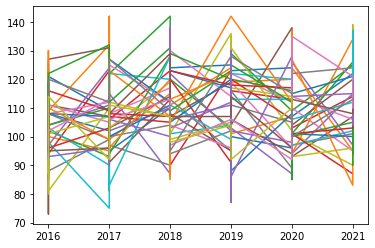

In [30]:
import matplotlib.pyplot as plt

team_names = cleaned_lakers["OPPOSING_TEAM_ID"].unique()

for team_name in team_names:
    curr_df = cleaned_lakers[cleaned_lakers["OPPOSING_TEAM_ID"] == team_name]  
    plt.plot(curr_df["SEASON"], curr_df["OPPOSING_PTS"])

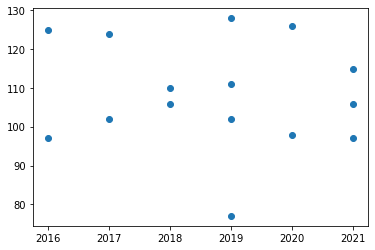

In [33]:
NETS_TEAM_ID = 1610612751

curr_df = cleaned_lakers[cleaned_lakers["OPPOSING_TEAM_ID"] == NETS_TEAM_ID]  
plt.scatter(curr_df["SEASON"], curr_df["OPPOSING_PTS"])